# CodeLab 02: Understanding 'gradients' related to images
------------------------------------------------------------------------------------------------

### Objective: What are image 'gradients' and how are they used to find edges in images?

Author: Rajesh Siraskar
Date:   08-Dec-2018

**NOTE**: Please see 'Code Lab 01: Basics on image coordinates' first

#### 08-Dec-2018: Ref. Klette pg. 11
- (Klette, 2014: 11): See 'Detecting Step-Edges by First- or Second-Order Derivatives'
- 1st order and 2nd order derivatives provide edge detection
- The 'curve' on which to do derivatives are intensities? Along X or Y axes
- Check using simple high contrast images developed in MS Paint
- See if we can plot the intensities along sections of a square and triangle and see expected itensity peaks

Imports

In [7]:
# Jupyter specific command to plot images inline with document
%matplotlib inline

# Import modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

Display the gray scale image version of square and triangle

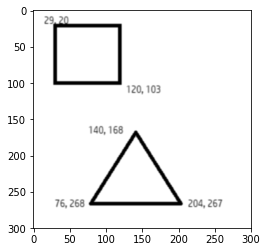

In [14]:
image = cv2.imread('lab_edge_detection_bw.png', 0)

plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Derivatives for edge detection

- Plot above is the 'curve' of intensities
- Taking derivatives help detect edges since they detect the change in gradient of the function

- For pixels 'derivatives' are only approximately derived using kernels
- Sobel kernel is one such kernel


In [15]:
# Sobel filters for computing gradients
# API: cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
grad_x = cv2.Sobel(image, cv2.CV_32F, dx=1, dy=0, ksize=1)
grad_y = cv2.Sobel(image, cv2.CV_32F, dx=0, dy=1, ksize=1)

In [16]:
# Compute gradient magnitude and direction (in degrees) 
magnitude, direction = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)

Text(0.5,1,'Gradient in y direction')

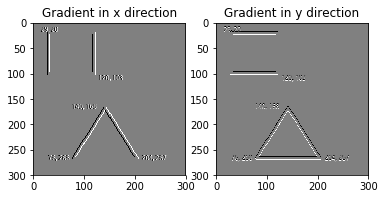

In [17]:
# Plot gradients in x,y directions 
fig, axes = plt.subplots(1, 2)

axes[0].imshow(grad_x, cmap = 'gray')
axes[0].set_title('Gradient in x direction')
axes[1].imshow(grad_y, cmap = 'gray')
axes[1].set_title('Gradient in y direction')

## Attempt building a derivative kernel

#### (Klette, 2014: 63) Ref: "Fig. 2.18 Filter kernels for the Sobel operator"

x direction kernel

|   grad X   |
|----|---|---|
| -1 | 0 | 1 |
| -2 | 0 | 2 |
| -1 | 0 | 1 |

grad Y is transpose of grad X kernel


In [23]:
# Define the kernel
grad_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
grad_y_kernel = grad_x_kernel.transpose()

# Apply the kernels using filter2D() i.e. convolve the image with the kernel
#   anchor: the relative position of a filtered point within the kernel
#           default value (-1,-1) used. i.e. anchor is at kernel center
grad_x_custom = cv2.filter2D(image, -1, grad_x_kernel)
grad_y_custom = cv2.filter2D(image, -1, grad_y_kernel)

Text(0.5,1,'Custom kernel: Gradient in y direction')

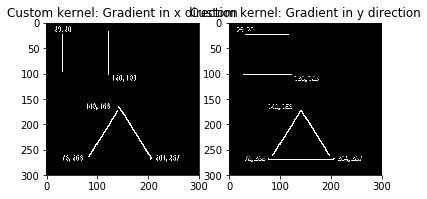

In [26]:
# Plot gradients in x,y directions 
fig, axes = plt.subplots(1, 2)

axes[0].imshow(grad_x_custom, cmap = 'gray')
axes[0].set_title('Custom kernel: Gradient in x direction')
axes[1].imshow(grad_y_custom, cmap = 'gray')
axes[1].set_title('Custom kernel: Gradient in y direction')

## Attempt custom derivative on more complex images

All code will be placed in a single cell

(Text(0.5,1,'Gradient in y direction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

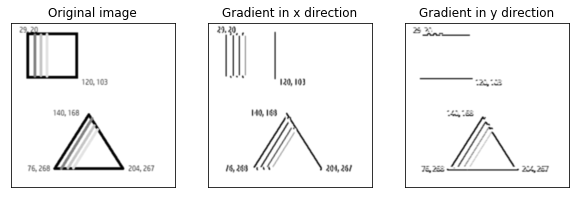

In [39]:
image_2 = cv2.imread('lab_edge_detection_shaded.png', 0)

# Apply the kernels using filter2D() i.e. convolve the image with the kernel
#   anchor: the relative position of a filtered point within the kernel
#           default value (-1,-1) used. i.e. anchor is at kernel center
grad_x_custom = cv2.filter2D(image_2, -1, grad_x_kernel)
grad_y_custom = cv2.filter2D(image_2, -1, grad_y_kernel)

# Invert the images for a better view
grad_x_custom = cv2.bitwise_not(grad_x_custom)
grad_y_custom = cv2.bitwise_not(grad_y_custom)

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_2, cmap = 'gray', interpolation = 'bicubic')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(grad_x_custom, cmap = 'gray', interpolation = 'bicubic')
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(grad_y_custom, cmap = 'gray', interpolation = 'bicubic')
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Gradient in y direction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

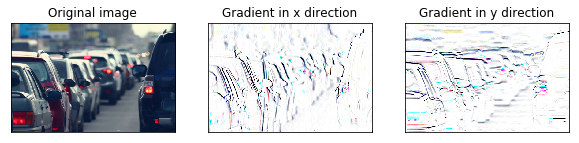

In [89]:
image_2 = cv2.imread('traffic.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Apply the kernels using filter2D() i.e. convolve the image with the kernel
#   anchor: the relative position of a filtered point within the kernel
#           default value (-1,-1) used. i.e. anchor is at kernel center
grad_x_custom = cv2.filter2D(image_2, -1, grad_x_kernel)
grad_y_custom = cv2.filter2D(image_2, -1, grad_y_kernel)

# Invert the images for a better view
grad_x_custom = cv2.bitwise_not(grad_x_custom)
grad_y_custom = cv2.bitwise_not(grad_y_custom)

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_2)
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(grad_x_custom)
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(grad_y_custom)
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Magnitude plot'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

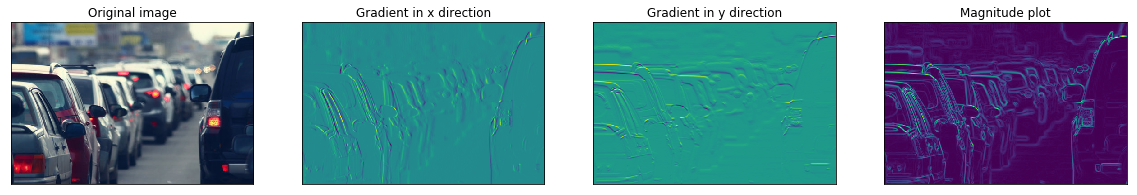

In [92]:
image_original = cv2.imread('traffic.jpg')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
image_3 = cv2.imread('traffic.jpg', 0)

# Compute gradients in x and y directions
grad_x_custom = cv2.filter2D(image_3, cv2.CV_32F, grad_x_kernel)
grad_y_custom = cv2.filter2D(image_3, cv2.CV_32F, grad_y_kernel)

# Compute magnitude and direction using Polar coordinates 
magnitude, angle = cv2.cartToPolar(grad_x_custom, grad_y_custom, angleInDegrees=True)

plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_original)
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(grad_x_custom)
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(grad_y_custom)
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(magnitude)
plt.title('Magnitude plot'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Magnitude plot'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

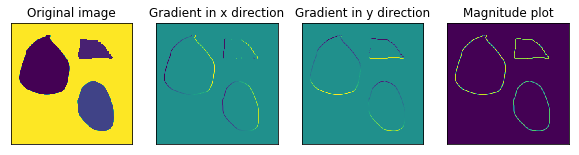

In [85]:
image_3 = cv2.imread('lab_edge_detection_coloured.png', 0)

# Compute gradients in x and y directions
grad_x_custom = cv2.filter2D(image_3, cv2.CV_32F, grad_x_kernel)
grad_y_custom = cv2.filter2D(image_3, cv2.CV_32F, grad_y_kernel)

# Compute magnitude and direction using Polar coordinates 
magnitude, angle = cv2.cartToPolar(grad_x_custom, grad_y_custom, angleInDegrees=True)

plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
plt.imshow(image_3)
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(grad_x_custom)
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(grad_y_custom)
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(magnitude)
plt.title('Magnitude plot'), plt.xticks([]), plt.yticks([])